In [1]:
from evaluate import load
import os
bertscore = load("bertscore")
import warnings
warnings.filterwarnings("ignore")

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def bertscore_calc(predictions, references):
    
    num_diff = len(references) - len(predictions)
    assert(num_diff == 0)
    
    results = bertscore.compute(predictions=predictions, references=references, lang="en")
        
    
    return (results['f1'], sum(results['f1']) / len(results['f1']))

In [5]:
A = ["Hi, my name is Jeppy and I like to play games. Hi, my name is David and I am good at Python."]
B = ["Hi, my name is David and I am good at Python. Hi, my name is Jeppy and I like to play games."]

In [7]:
bertscore_calc(A, B)

([0.9843522906303406], 0.9843522906303406)

In [20]:
A = ["Hi, my name is Jeppy and I like to play games. Hi, my name is David and I am good at Python."]
B = ["Hi, my name is James and I like to play games. "]

In [22]:
bertscore_calc(A, B)

([0.9455161094665527], 0.9455161094665527)

Is this effective then? We don't know. Let us actually run it.

In [33]:
data_dir = "../../data"
res = []
for meeting in os.listdir(data_dir):
    print("# ", meeting)
    meeting_dir = f"{data_dir}/{meeting}/reference"
    ref_action_dir = os.path.join(meeting_dir, "action.txt")
    out_action_dir = f"{data_dir}/{meeting}/generated_action.txt"
    
    with open(ref_action_dir, encoding='utf-8') as file:
        ref_action_lst = [x.strip() for x in file.readlines() if x.strip()]
    with open(out_action_dir, encoding='utf-8') as file:
        out_action_dir = [x.strip() for x in file.readlines() if x.strip()]
    
    prediction = bertscore_calc([" ".join(out_action_dir)], [" ".join(ref_action_lst)])[0][0]
    print(prediction)
    res.append(prediction)

#     print(f"print('{meeting}: ', bertscore_calc(")
#     print("[ # prediction")
#     for i in out_action_dir:
#         print(f"\"{i}\", ")
#     print("]")
#     print(", [ # references")
#     for i in ref_action_lst:
#         print(f"\"{i}\", ")
#     print("]")
#     print("))")
#     print()


#  capstone_A0
0.9897086024284363
#  capstone_A1
0.9496819972991943
#  capstone_A2
0.9606580138206482
#  capstone_A3
0.9168279767036438
#  capstone_A4
0.9221943020820618
#  capstone_A5
0.9201257228851318
#  dataScraping_A0
0.9368094205856323
#  dataScraping_A1
0.9313329458236694
#  dataScraping_A2
0.9192971587181091
#  dataScraping_A3
0.9186093807220459
#  dataScraping_A4
0.9400128722190857
#  dataScraping_A5
0.9218786358833313
#  searchEngine_A0
0.9541051387786865
#  searchEngine_A1
0.9346190094947815
#  searchEngine_A2
0.9450914263725281
#  searchEngine_A3
0.9433116316795349
#  searchEngine_A4
0.9286027550697327
#  searchEngine_A5
0.9244458675384521
#  techNews_A0
0.9528194069862366
#  techNews_A1
0.9424868822097778
#  techNews_A2
0.9532867074012756
#  techNews_A3
0.9205946326255798
#  techNews_A4
0.8962640166282654
#  techNews_A5
0.90642249584198


In [36]:
res = np.array(res)

In [43]:
pd.DataFrame(res.reshape(4, 6)).round(3)

,0,1,2,3,4,5
0,0.990,0.950,0.961,0.917,0.922,0.920
1,0.937,0.931,0.919,0.919,0.940,0.922
2,0.954,0.935,0.945,0.943,0.929,0.924
3,0.953,0.942,0.953,0.921,0.896,0.906


In [55]:
df = pd.DataFrame(res.reshape(4, 6)).round(3)
df

,0,1,2,3,4,5
0,0.990,0.950,0.961,0.917,0.922,0.920
1,0.937,0.931,0.919,0.919,0.940,0.922
2,0.954,0.935,0.945,0.943,0.929,0.924
3,0.953,0.942,0.953,0.921,0.896,0.906


In [56]:
df.index = ['capstone(1-2)', 'scraping(9)', 'search(9)', 'technews(1-2)']

Text(0, 0.5, 'Bert Score')

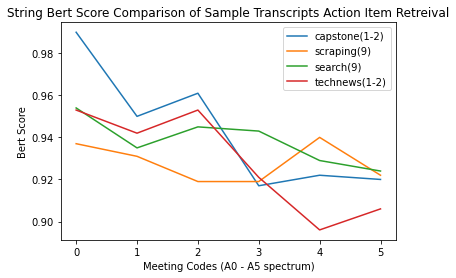

In [62]:
df.T.plot()
plt.title("String Bert Score Comparison of Sample Transcripts Action Item Retreival")
plt.xlabel("Meeting Codes (A0 - A5 spectrum)")
plt.ylabel("Bert Score")